In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt

#### Read in Datasets and Files

* metroentrances contains a shapefile of all of the entrances to metro stations

In [4]:
metroentrances = gpd.read_file("../../Data/RailStationEntrances2023.zip")

#### Preprocessing


* dissolve the metro entrances into multipoints of stations based on the station name
* Make the geometry of the multipoint the centroid
* Change the CRS into a projected coordinate system with meters

In [5]:
stations = metroentrances.dissolve(by='STATIONNAM')
stations['geometry'] = stations.centroid
stations=stations.to_crs("EPSG:32618")
stations.head(2)

,geometry,OBJECTID,ID,STATIONNM,DESCRPTION,ENTRANCE_T,ADDRESS,ENTRANCEID,STATIONCOD,ENTRANCENA,...,SYMBOL_ROT,SERVICE_LI,SERVICE__1,SERVICE__2,ENTRANCE_1,SRVICELINE,ACCESS_TYP,RULEID,ENTRANCE_2,SERVICELIN
STATIONNAM,,,,,,,,,,,,,,,,,,,,,
ADDISON ROAD-SEAT PLEASANT,POINT (335575.906 4305913.519),833,0,ADDISON ROAD-SEAT PLEASANT,Station entrance is reachable by the walkway f...,STREET,"100 ADDISON ROAD S, CAPITOL HEIGHTS, MD 20743",21,G03,"MAIN ENTRANCE (ADDISON RD, SOUTH OF CENTRAL AVE)",...,90.0,BLUE,SILVER,None,ADDISON RD & CENTRAL AVE,BS,STREET,4,"ADDISON RD, SOUTH OF CENTRAL AVE",BS
ANACOSTIA,POINT (326869.085 4303461.041),821,0,ANACOSTIA,Station entrance from south side of Howard St ...,STREET,"1101 HOWARD ROAD SE, WASHINGTON, DC 20020",10,F06,SOUTH ENTRANCE 1 (HOWARD RD SE & FIRTH STERING...,...,256.7,GREEN,None,None,HOWARD RD SE & SHANNON PL SE (EAST),G,STREET,6,HOWARD RD SE & FIRTH STERING AVE SE,G


* Find the Metro Center station and report its geometry
* Using geopandas, find the euclidean distance in meters from each of the stations to the metro center station
* Divide the euclidean distance by 1609 to get the distance in miles
* Subset the dataframe to only the station names and the distance in miles
* Export

In [6]:
metrocenter = stations.reset_index()
metrocenter = metrocenter[metrocenter['STATIONNM'] == 'METRO CENTER']
metrocenter['geometry']

55    POINT (324123.612 4307446.652)
Name: geometry, dtype: geometry

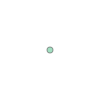

In [7]:
metrocenter2 = Point(324123.612, 4307446.652)
metrocenter2

In [8]:
stations['distance'] = stations.distance(metrocenter2)
stations['distance_miles'] = stations['distance'] /1609

In [9]:
stations.reset_index(inplace=True)
stations = stations[['STATIONNAM', 'distance_miles']]

In [10]:
stations.to_excel("output/stations.xlsx", sheet_name='stations', index=True)